*** Importing Libraries ***

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*** Import Dataset ***

In [71]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

*** Data Understanding ***

In [72]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
#11 rows in Total Charges are empty
df=df[df['TotalCharges']!=' ']

In [75]:
#Converting into corresponding data types
df['SeniorCitizen']=pd.Categorical(df['SeniorCitizen'])
df.TotalCharges=df.TotalCharges.astype('float64')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 n

In [77]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [78]:
df.to_csv('out.csv', encoding='utf-8', index=False)

### Initial Analysis

In [79]:
#Separting categorical and numerical columns in the dataset
df_numeric=df.select_dtypes(include=['float64','int64'])
df_category=df.select_dtypes(exclude=['float64','int64'])

In [80]:
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [81]:
df_category=df_category.drop(['customerID'],axis=1)
df_category.describe().transpose()

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


*** Overall Churn Numbers and Churn Rate ***

In [82]:
#Overall target rate Churn
a=df.groupby(by=['Churn'])[['customerID']].count().reset_index()
a
churn_no_count = a._get_value(0, 'customerID')
churn_yes_count = a._get_value(1, 'customerID')

In [83]:
print('The overall churn rate in the model is: ',churn_yes_count/(churn_no_count+churn_yes_count)*100)

The overall churn rate in the model is:  26.578498293515356


*** Churn Numbers and Churn Rate grouped by Gender ***

In [84]:
gender_churn=df.groupby(by=['gender','Churn'])[['customerID']].count()
gender_churn

customerID
gender Churn            
Female No           2544
       Yes           939
Male   No           2619
       Yes           930

In [85]:
gender_churn_rate=gender_churn/gender_churn.groupby(level=0).sum()*100
gender_churn_rate

customerID
gender Churn            
Female No      73.040482
       Yes     26.959518
Male   No      73.795435
       Yes     26.204565

*** Churn Numbers and Churn Rate grouped by Senior Citizen ***

In [86]:
seniors_churn=df.groupby(by=['SeniorCitizen','Churn'])[['customerID']].count()
seniors_churn

customerID
SeniorCitizen Churn            
0             No           4497
              Yes          1393
1             No            666
              Yes           476

In [87]:
seniors_churn_rate=seniors_churn/seniors_churn.groupby(level=0).sum()*100
seniors_churn_rate

customerID
SeniorCitizen Churn            
0             No      76.349745
              Yes     23.650255
1             No      58.318739
              Yes     41.681261

*** Churn Numbers and Churn Rate grouped by Partner ***

In [88]:
partner_churn=df.groupby(by=['Partner','Churn'])[['customerID']].count()
partner_churn

customerID
Partner Churn            
No      No           2439
        Yes          1200
Yes     No           2724
        Yes           669

In [89]:
partner_churn_rate=partner_churn/partner_churn.groupby(level=0).sum()*100
partner_churn_rate

customerID
Partner Churn            
No      No      67.023908
        Yes     32.976092
Yes     No      80.282935
        Yes     19.717065

*** Churn Numbers and Churn Rate grouped by Dependents ***

In [90]:
dependednts_churn=df.groupby(by=['Dependents','Churn'])[['customerID']].count()
dependednts_churn

customerID
Dependents Churn            
No         No           3390
           Yes          1543
Yes        No           1773
           Yes           326

In [91]:
dependednts_churn_rate=dependednts_churn/dependednts_churn.groupby(level=0).sum()*100
dependednts_churn_rate

customerID
Dependents Churn            
No         No      68.720860
           Yes     31.279140
Yes        No      84.468795
           Yes     15.531205

*** Churn Numbers and Churn Rate grouped by PhoneService ***

In [92]:
phoneservice_churn=df.groupby(by=['PhoneService','Churn'])[['customerID']].count()
phoneservice_churn

customerID
PhoneService Churn            
No           No            510
             Yes           170
Yes          No           4653
             Yes          1699

In [93]:
phoneservice_churn_rate=phoneservice_churn/phoneservice_churn.groupby(level=0).sum()*100
phoneservice_churn_rate

customerID
PhoneService Churn            
No           No      75.000000
             Yes     25.000000
Yes          No      73.252519
             Yes     26.747481

*** Churn Numbers and Churn Rate grouped by MultipleLines ***

In [94]:
multiple_line_churn=df.groupby(by=['MultipleLines','Churn'])[['customerID']].count()
multiple_line_churn

customerID
MultipleLines    Churn            
No               No           2536
                 Yes           849
No phone service No            510
                 Yes           170
Yes              No           2117
                 Yes           850

In [95]:
multiple_line_churn_rate=multiple_line_churn/multiple_line_churn.groupby(level=0).sum()*100
multiple_line_churn_rate

customerID
MultipleLines    Churn            
No               No      74.918759
                 Yes     25.081241
No phone service No      75.000000
                 Yes     25.000000
Yes              No      71.351534
                 Yes     28.648466

*** Churn Numbers and Churn Rate grouped by InternetService ***

In [96]:
internet_service_churn=df.groupby(by=['InternetService','Churn'])[['customerID']].count()
internet_service_churn

customerID
InternetService Churn            
DSL             No           1957
                Yes           459
Fiber optic     No           1799
                Yes          1297
No              No           1407
                Yes           113

In [97]:
internet_service_churn_rate=internet_service_churn/internet_service_churn.groupby(level=0).sum()*100
internet_service_churn_rate

customerID
InternetService Churn            
DSL             No      81.001656
                Yes     18.998344
Fiber optic     No      58.107235
                Yes     41.892765
No              No      92.565789
                Yes      7.434211

*** Churn Numbers and Churn Rate grouped by OnlineSecurity ***

In [98]:
a=df.groupby(by=['OnlineSecurity','Churn'])[['customerID']].count()
a

customerID
OnlineSecurity      Churn            
No                  No           2036
                    Yes          1461
No internet service No           1407
                    Yes           113
Yes                 No           1720
                    Yes           295

In [99]:
c=a/a.groupby(level=0).sum()*100
c

customerID
OnlineSecurity      Churn            
No                  No      58.221333
                    Yes     41.778667
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      85.359801
                    Yes     14.640199

*** Churn Numbers and Churn Rate grouped by OnlineBackup ***

In [100]:
a=df.groupby(by=['OnlineBackup','Churn'])[['customerID']].count()
a

customerID
OnlineBackup        Churn            
No                  No           1854
                    Yes          1233
No internet service No           1407
                    Yes           113
Yes                 No           1902
                    Yes           523

In [101]:
c=a/a.groupby(level=0).sum()*100
c

customerID
OnlineBackup        Churn            
No                  No      60.058309
                    Yes     39.941691
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      78.432990
                    Yes     21.567010

*** Churn Numbers and Churn Rate grouped by DeviceProtection ***

In [102]:
a=df.groupby(by=['DeviceProtection','Churn'])[['customerID']].count()
a

customerID
DeviceProtection    Churn            
No                  No           1883
                    Yes          1211
No internet service No           1407
                    Yes           113
Yes                 No           1873
                    Yes           545

In [103]:
c=a/a.groupby(level=0).sum()*100
c

customerID
DeviceProtection    Churn            
No                  No      60.859729
                    Yes     39.140271
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      77.460711
                    Yes     22.539289

*** Churn Numbers and Churn Rate grouped by TechSupport ***

In [104]:
a=df.groupby(by=['TechSupport','Churn'])[['customerID']].count()
a

customerID
TechSupport         Churn            
No                  No           2026
                    Yes          1446
No internet service No           1407
                    Yes           113
Yes                 No           1730
                    Yes           310

In [105]:
c=a/a.groupby(level=0).sum()*100
c

customerID
TechSupport         Churn            
No                  No      58.352535
                    Yes     41.647465
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      84.803922
                    Yes     15.196078

*** Churn Numbers and Churn Rate grouped by StreamingTV ***

In [106]:
a=df.groupby(by=['StreamingTV','Churn'])[['customerID']].count()
a

customerID
StreamingTV         Churn            
No                  No           1867
                    Yes           942
No internet service No           1407
                    Yes           113
Yes                 No           1889
                    Yes           814

In [107]:
c=a/a.groupby(level=0).sum()*100
c

customerID
StreamingTV         Churn            
No                  No      66.464934
                    Yes     33.535066
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      69.885313
                    Yes     30.114687

*** Churn Numbers and Churn Rate grouped by StreamingMovies ***

In [108]:
a=df.groupby(by=['StreamingMovies','Churn'])[['customerID']].count()
a

customerID
StreamingMovies     Churn            
No                  No           1843
                    Yes           938
No internet service No           1407
                    Yes           113
Yes                 No           1913
                    Yes           818

In [109]:
c=a/a.groupby(level=0).sum()*100
c

customerID
StreamingMovies     Churn            
No                  No      66.271125
                    Yes     33.728875
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      70.047602
                    Yes     29.952398

*** Churn Numbers and Churn Rate grouped by Contract ***

In [110]:
a=df.groupby(by=['Contract','Churn'])[['customerID']].count()
a

customerID
Contract       Churn            
Month-to-month No           2220
               Yes          1655
One year       No           1306
               Yes           166
Two year       No           1637
               Yes            48

In [111]:
c=a/a.groupby(level=0).sum()*100
c

customerID
Contract       Churn            
Month-to-month No      57.290323
               Yes     42.709677
One year       No      88.722826
               Yes     11.277174
Two year       No      97.151335
               Yes      2.848665

*** Churn Numbers and Churn Rate grouped by PaperlessBilling ***

In [112]:
a=df.groupby(by=['PaperlessBilling','Churn'])[['customerID']].count()
a

customerID
PaperlessBilling Churn            
No               No           2395
                 Yes           469
Yes              No           2768
                 Yes          1400

In [113]:
c=a/a.groupby(level=0).sum()*100
c

customerID
PaperlessBilling Churn            
No               No      83.624302
                 Yes     16.375698
Yes              No      66.410749
                 Yes     33.589251

*** Churn Numbers and Churn Rate grouped by PaymentMethod ***

In [114]:
a=df.groupby(by=['PaymentMethod','Churn'])[['customerID']].count()
a

customerID
PaymentMethod             Churn            
Bank transfer (automatic) No           1284
                          Yes           258
Credit card (automatic)   No           1289
                          Yes           232
Electronic check          No           1294
                          Yes          1071
Mailed check              No           1296
                          Yes           308

In [115]:
c=a/a.groupby(level=0).sum()*100
c

customerID
PaymentMethod             Churn            
Bank transfer (automatic) No      83.268482
                          Yes     16.731518
Credit card (automatic)   No      84.746877
                          Yes     15.253123
Electronic check          No      54.714588
                          Yes     45.285412
Mailed check              No      80.798005
                          Yes     19.201995

*** Visualization ***

*** Box plot of Tenure, Monthly Charges and Total Charges ***

[]

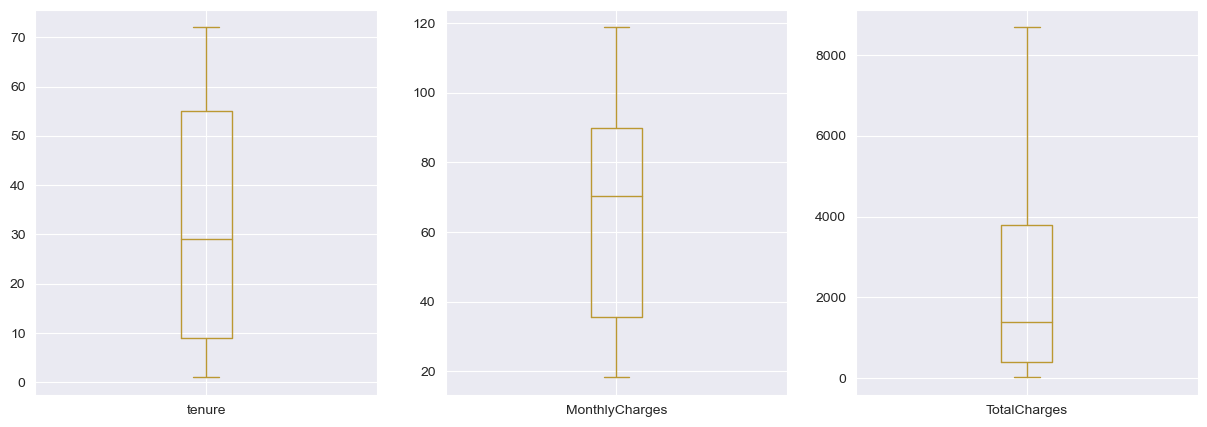

In [116]:
df_numeric.plot(kind='box', subplots=True, color='C1', figsize=(15,5))
plt.plot()

*** Numeric Pairplot ***

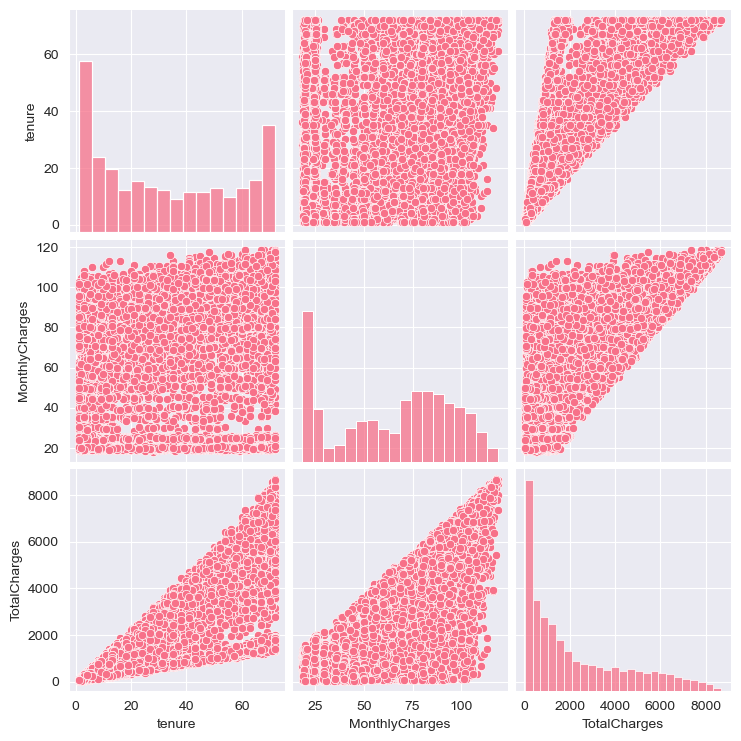

In [117]:
#Adding churn column to numeric dataset
df_numeric = pd.concat([df_numeric,df["Churn"]],axis=1)
sns.set_palette('husl')
sns.pairplot(df_numeric)

*** Combination plot to compare tenure among Churners and Non-Churners ***

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

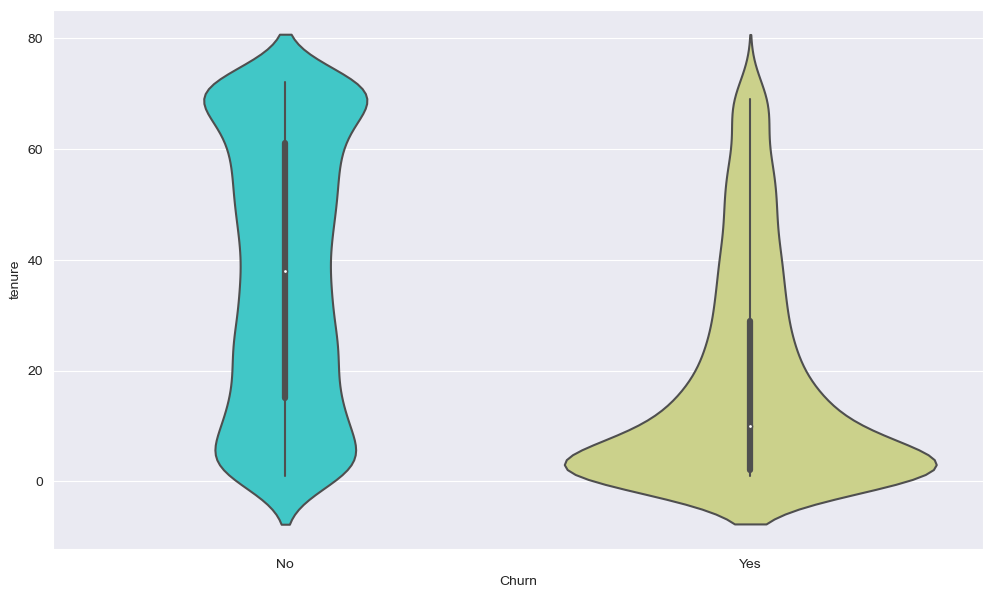

In [118]:
plt.figure(figsize=(12,7))
sns.violinplot(x="Churn", y="tenure", data=df_numeric,palette='rainbow')

*** Histogram of numeric plots ***

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

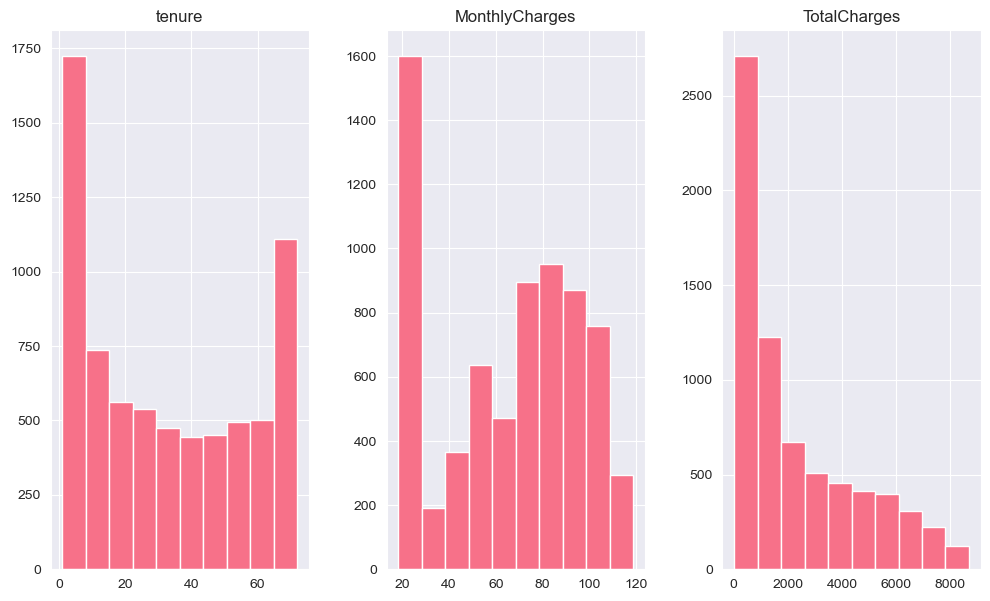

In [119]:
df_numeric.hist(layout=(1,3),figsize=(12,7))

*** Churners across Monthly Charges ***

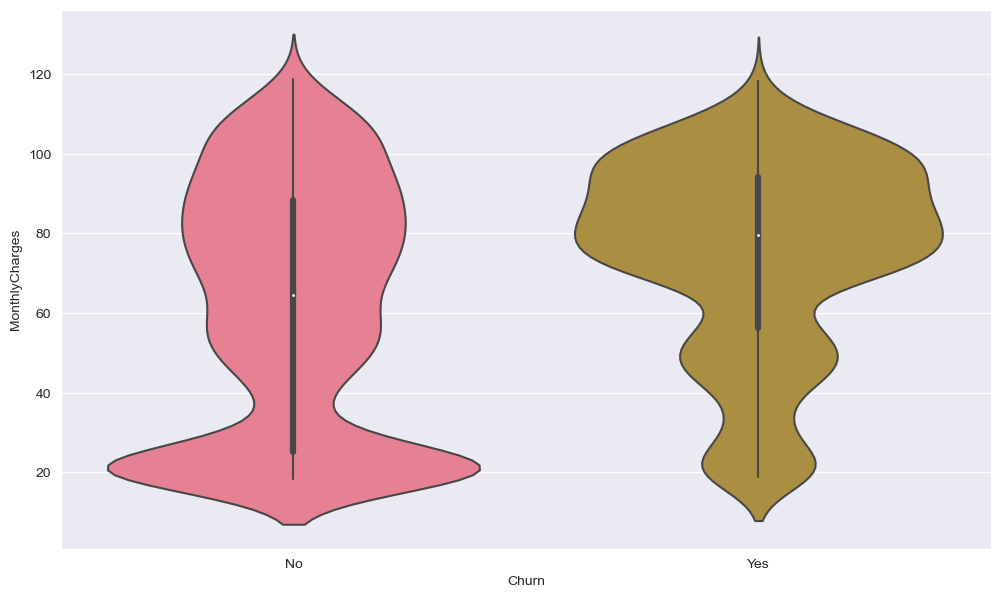

In [120]:
plt.figure(figsize=(12,7))
sns.violinplot(x="Churn", y="MonthlyCharges", data=df_numeric);

*** Churners across Total Charges ***

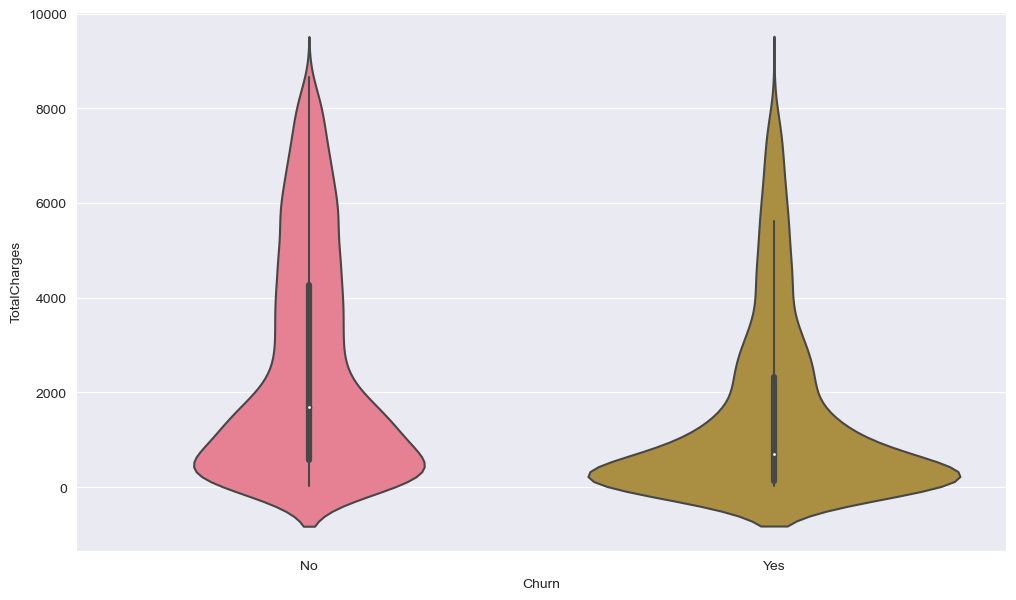

In [121]:
plt.figure(figsize=(12,7))
sns.violinplot(x="Churn", y="TotalCharges", data=df_numeric);

*** Tenure ,Monthly & Total charges across Categorical variables ***

<Figure size 1200x700 with 0 Axes>

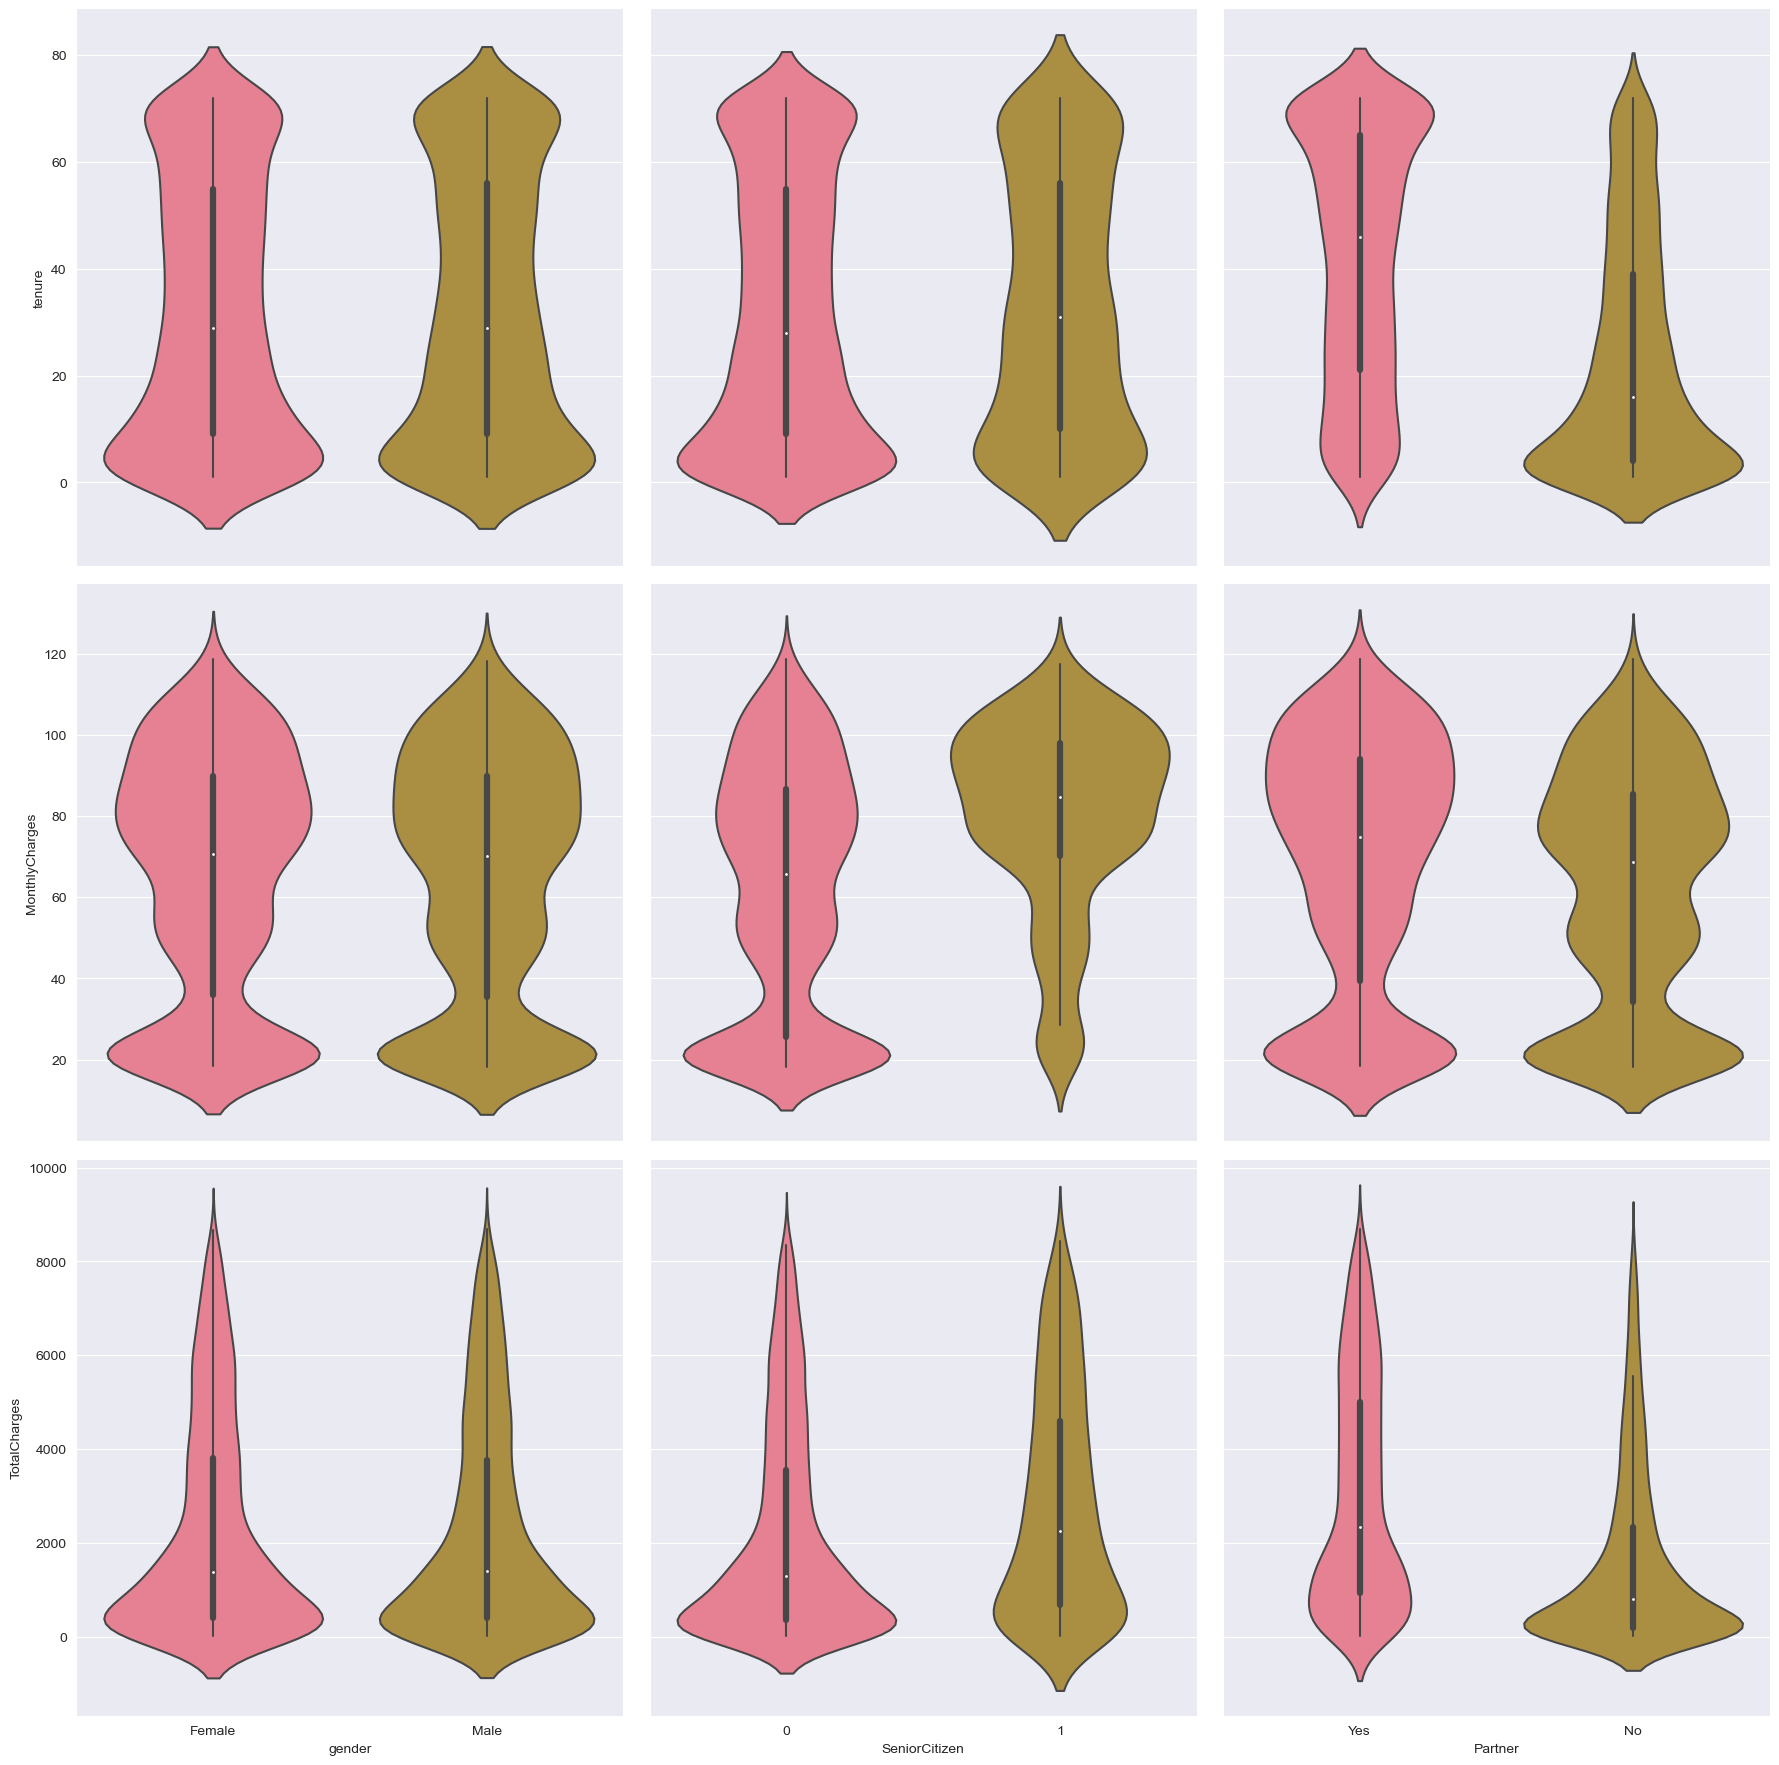

<Figure size 1200x700 with 0 Axes>

In [122]:
g = sns.PairGrid(df, x_vars=df_category.columns[0:3].values,y_vars=df_numeric.columns[0:3].values,size=6)
g.map(sns.violinplot);
plt.figure(figsize=(12,7))

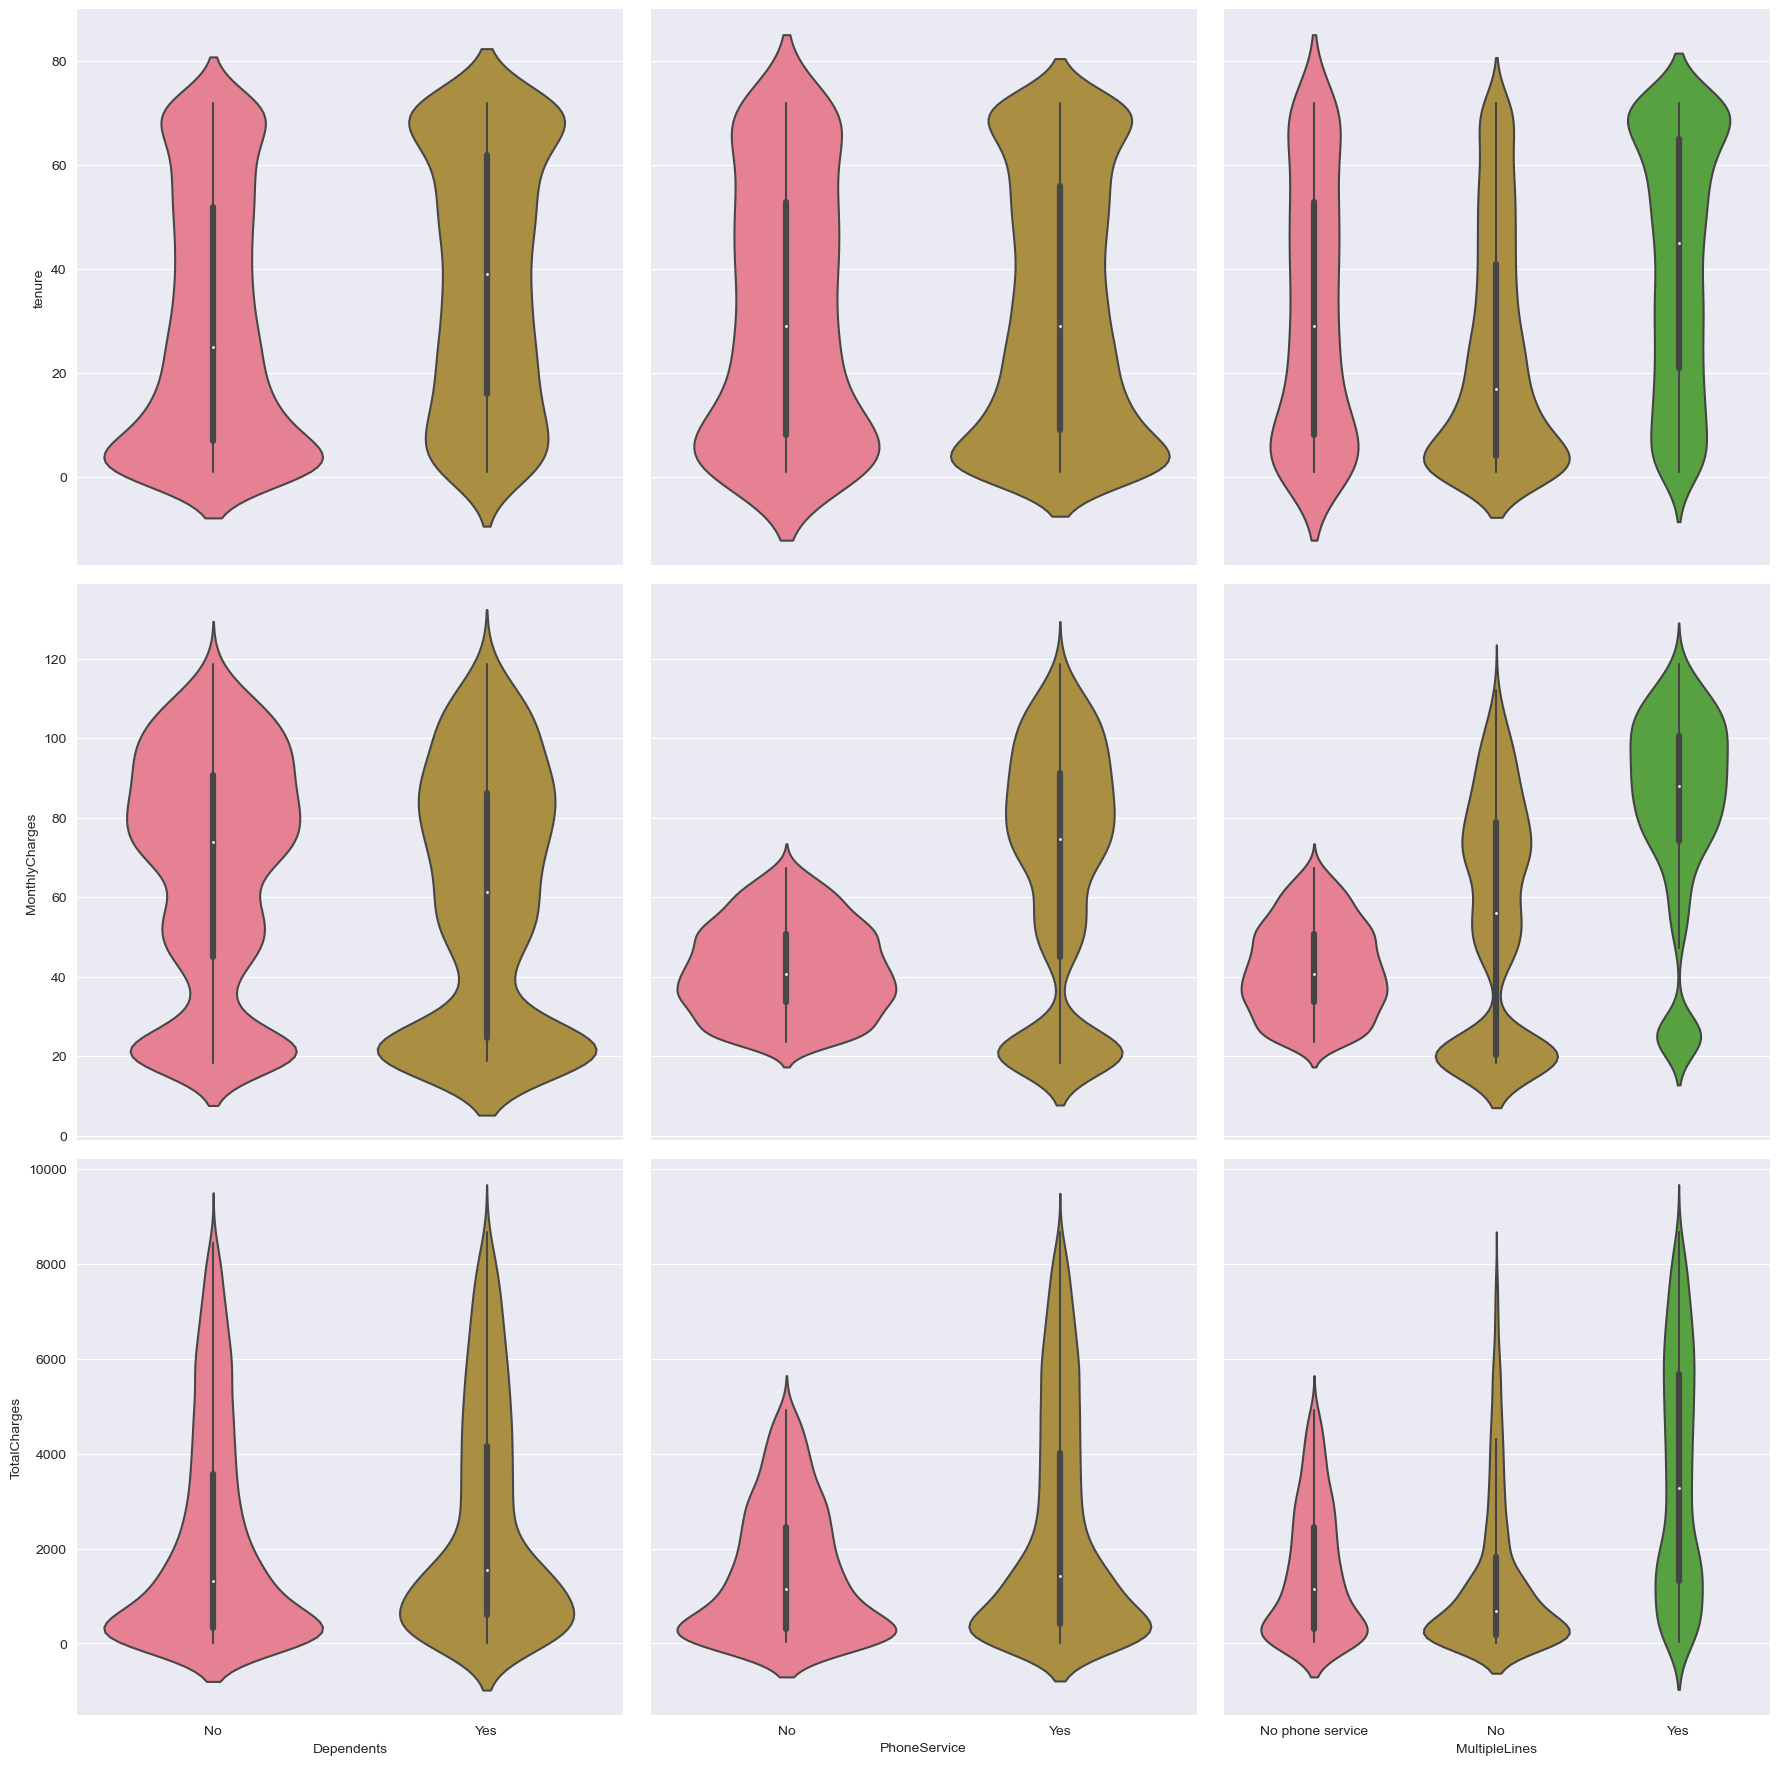

In [123]:
g = sns.PairGrid(df, x_vars=df_category.columns[3:6].values,y_vars=df_numeric.columns[0:3].values,size=6)
g.map(sns.violinplot);

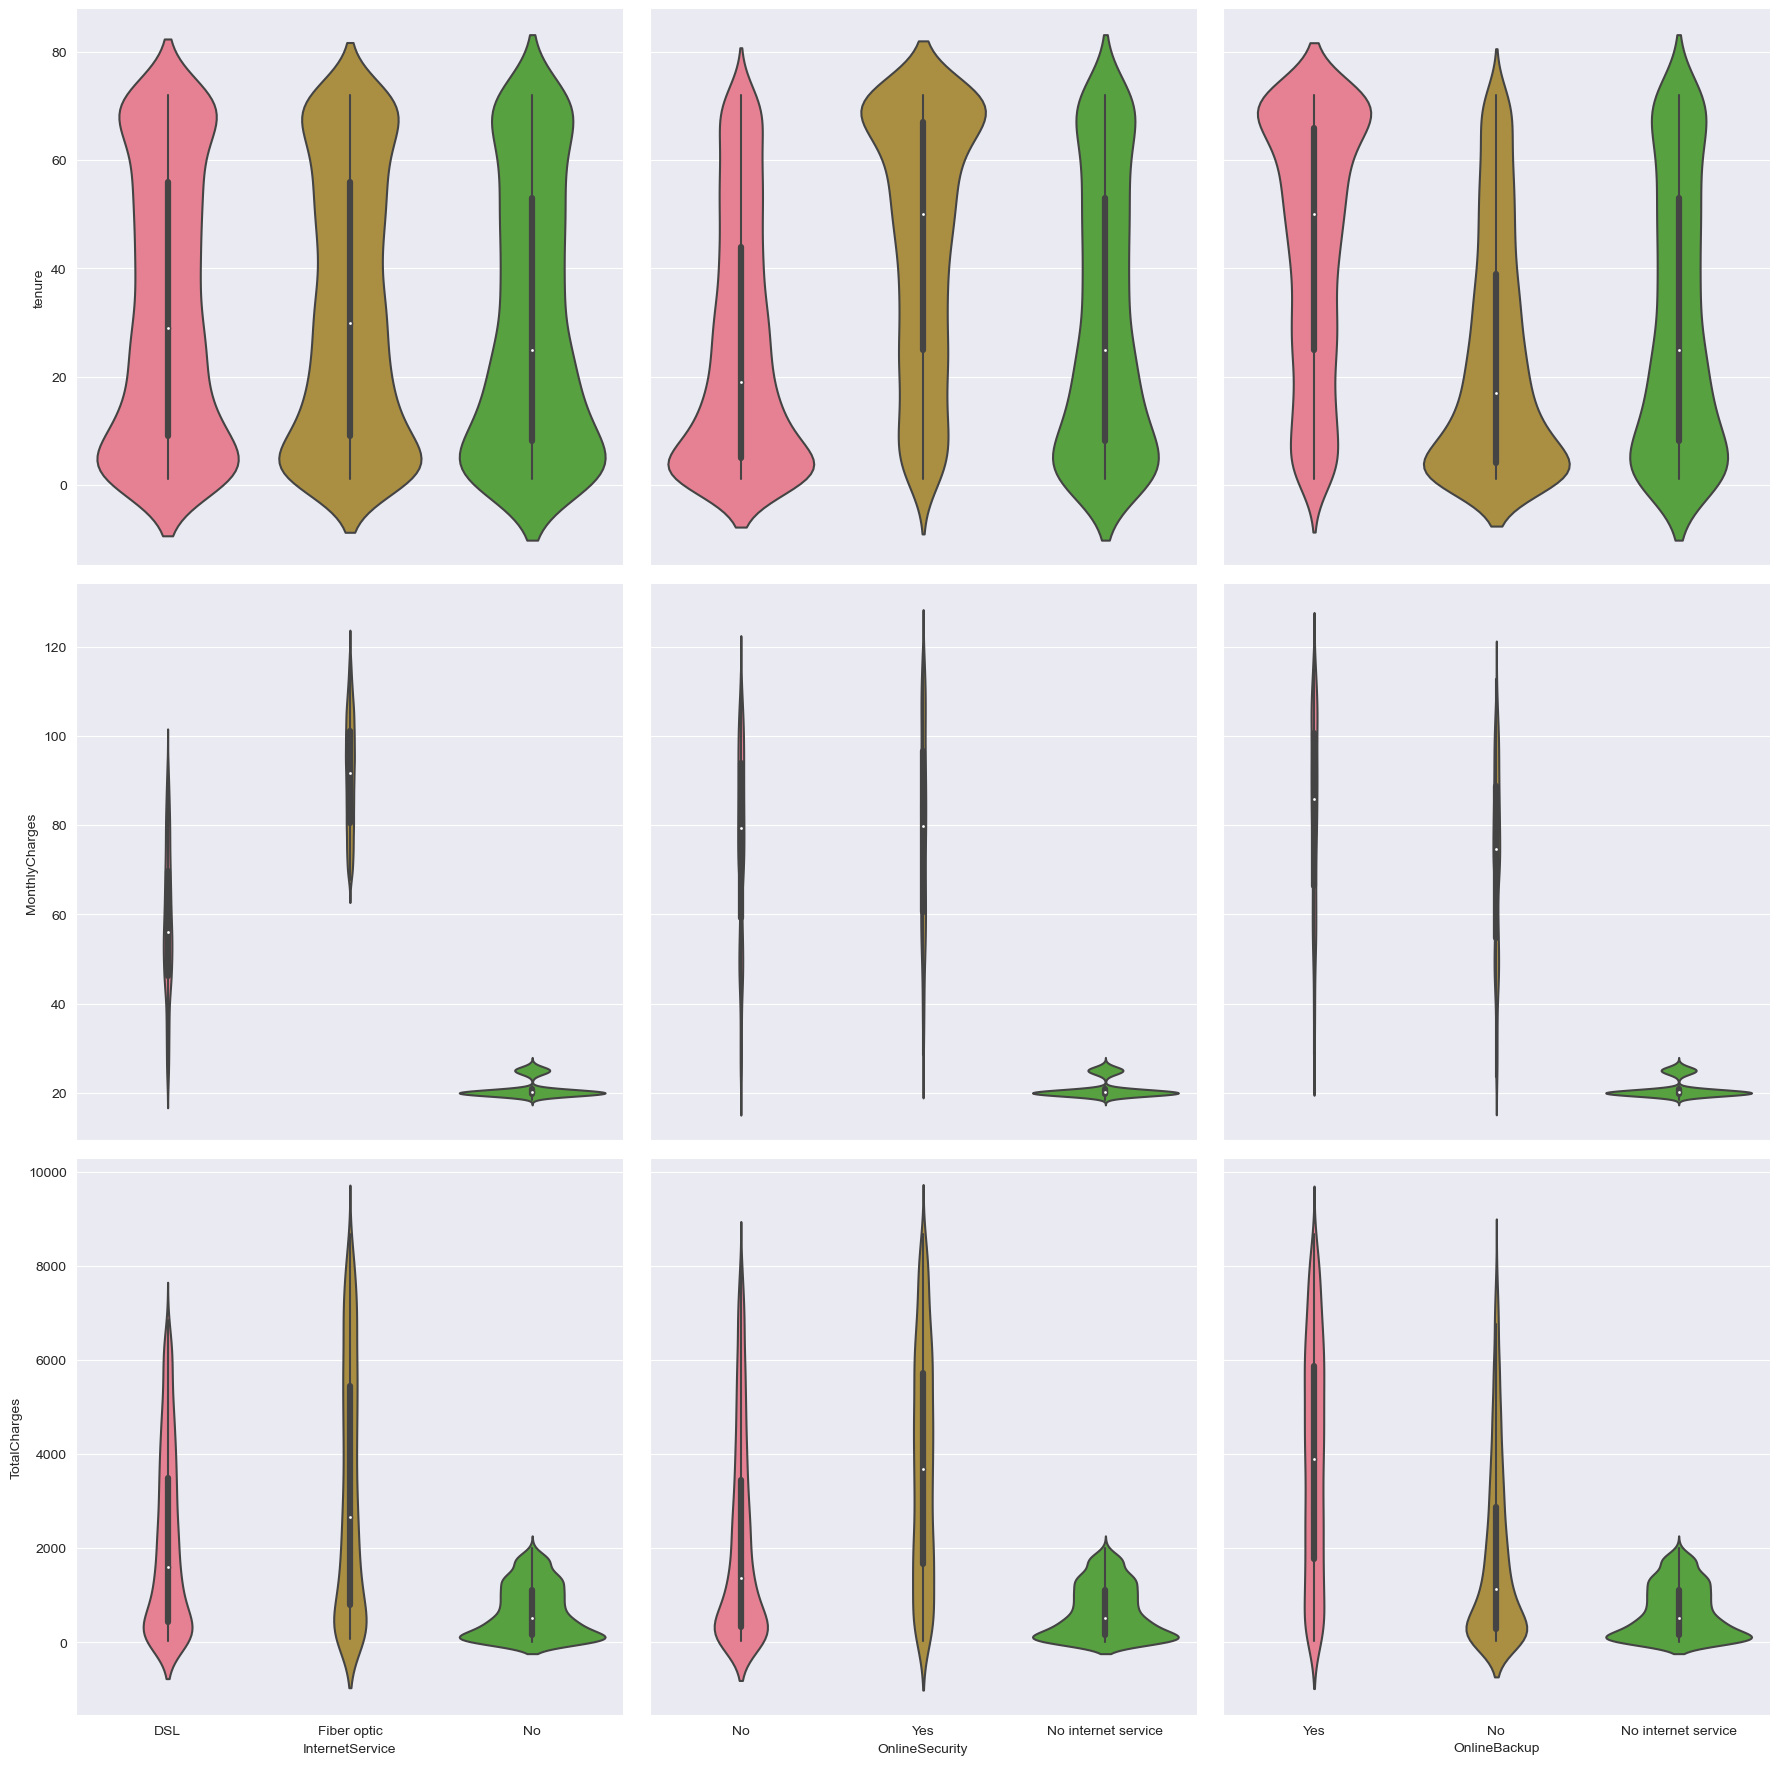

In [124]:
g = sns.PairGrid(df, x_vars=df_category.columns[6:9].values,y_vars=df_numeric.columns[0:3].values,size=6)
g.map(sns.violinplot);

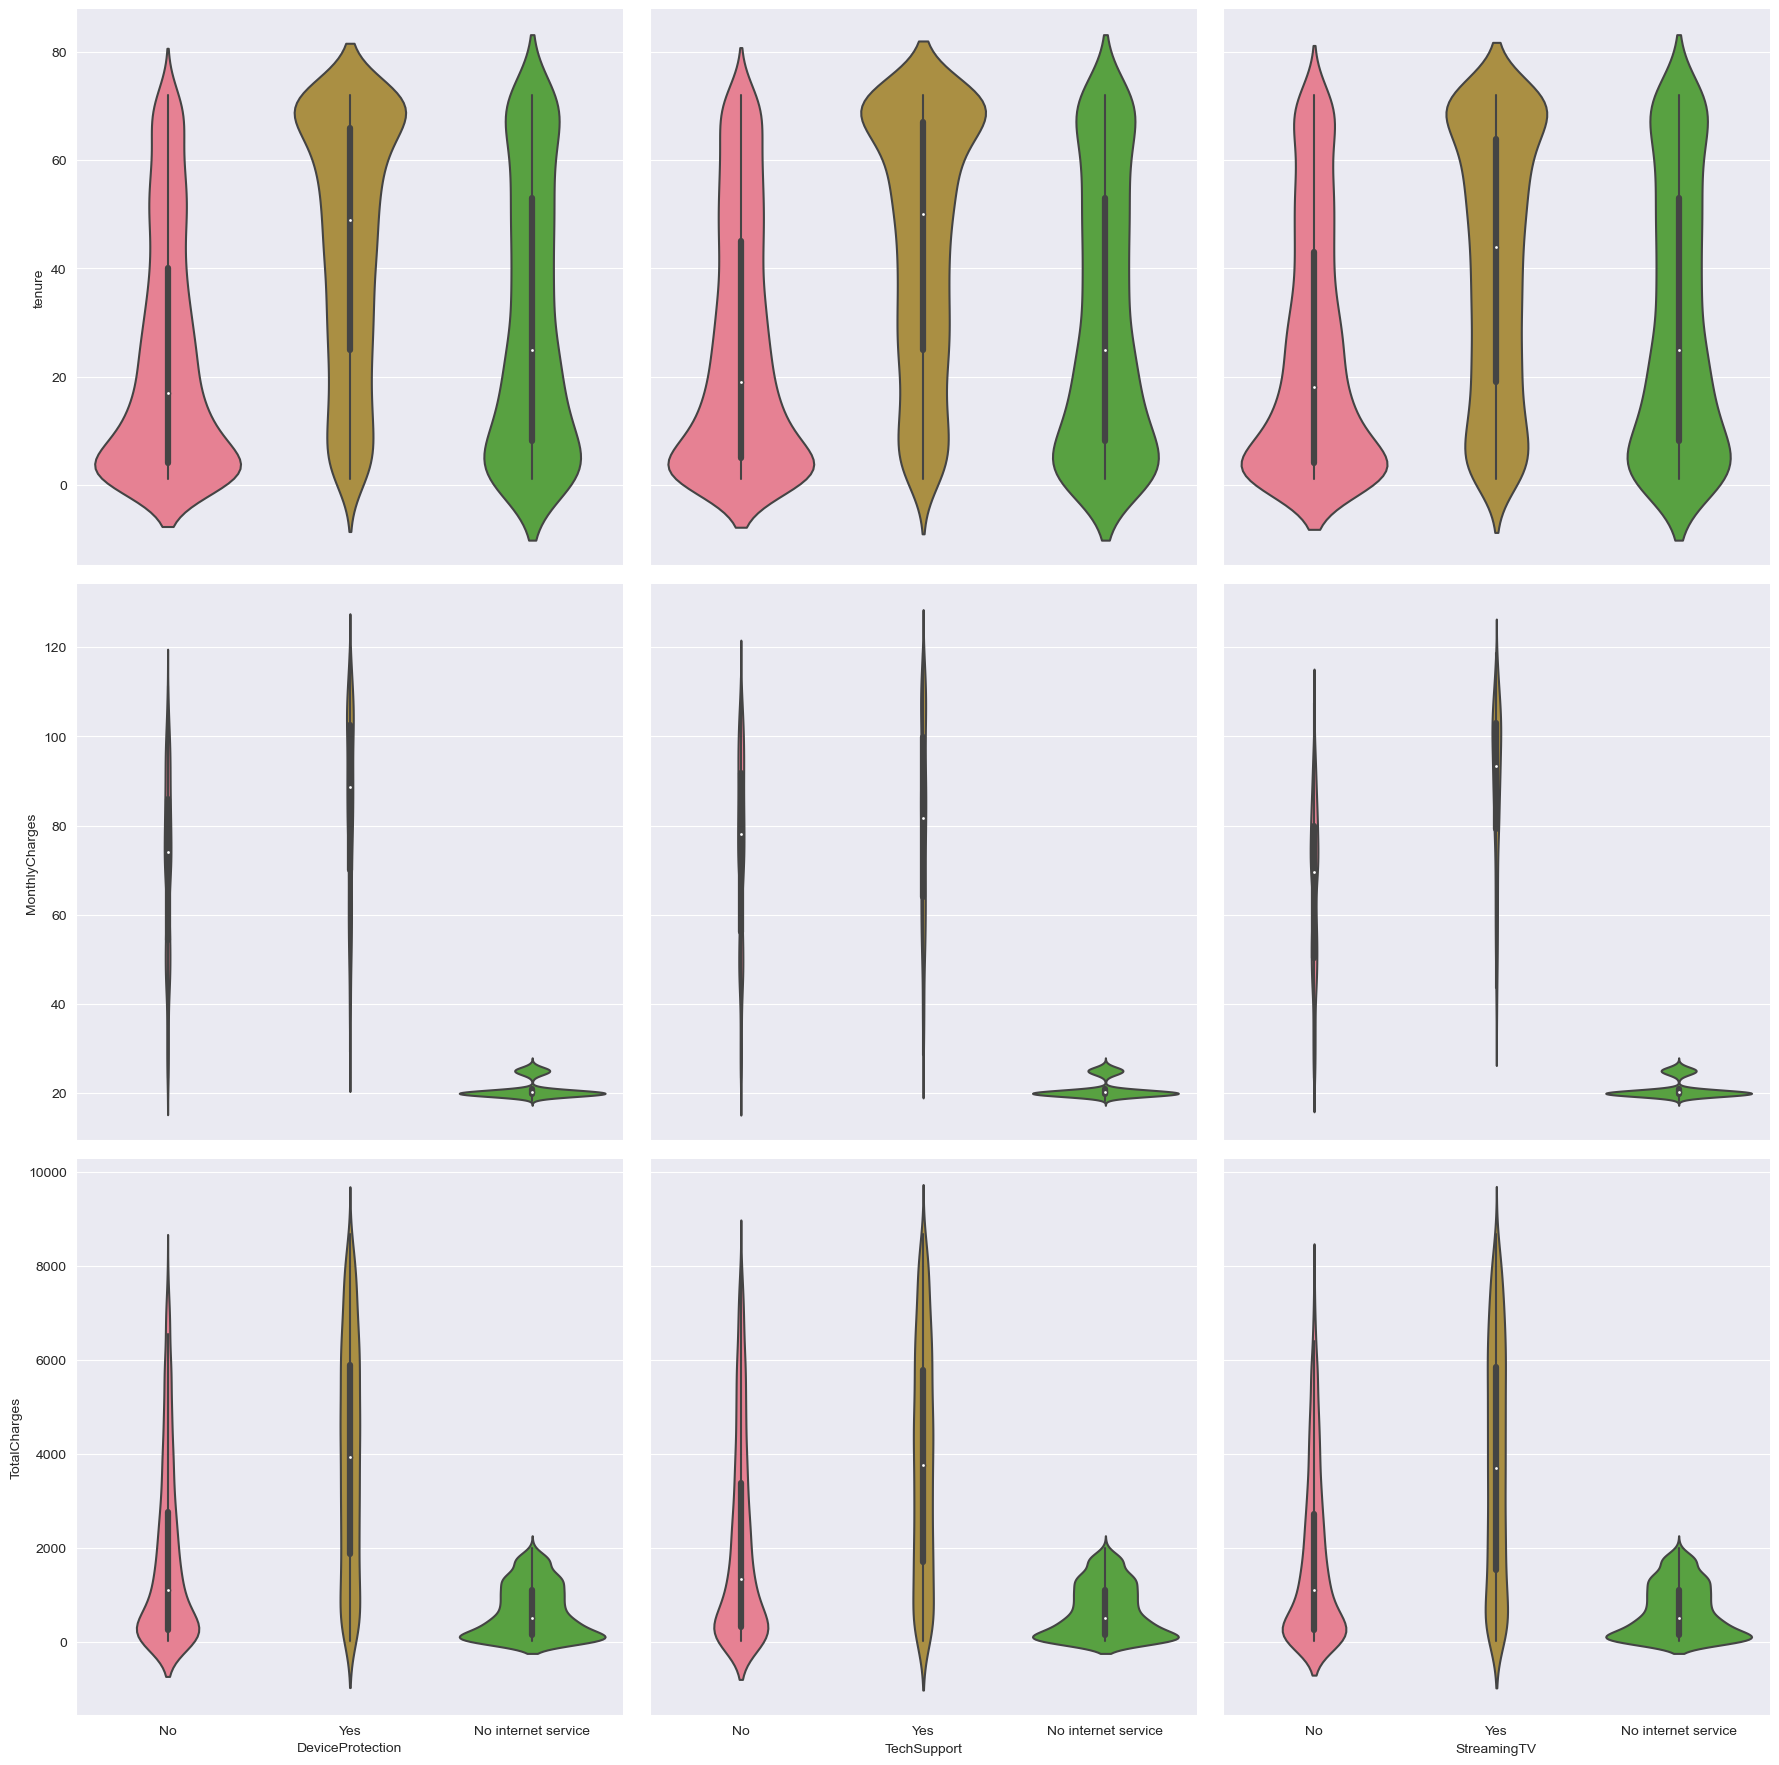

In [125]:
g = sns.PairGrid(df, x_vars=df_category.columns[9:12].values,y_vars=df_numeric.columns[0:3].values,size=6)
g.map(sns.violinplot);

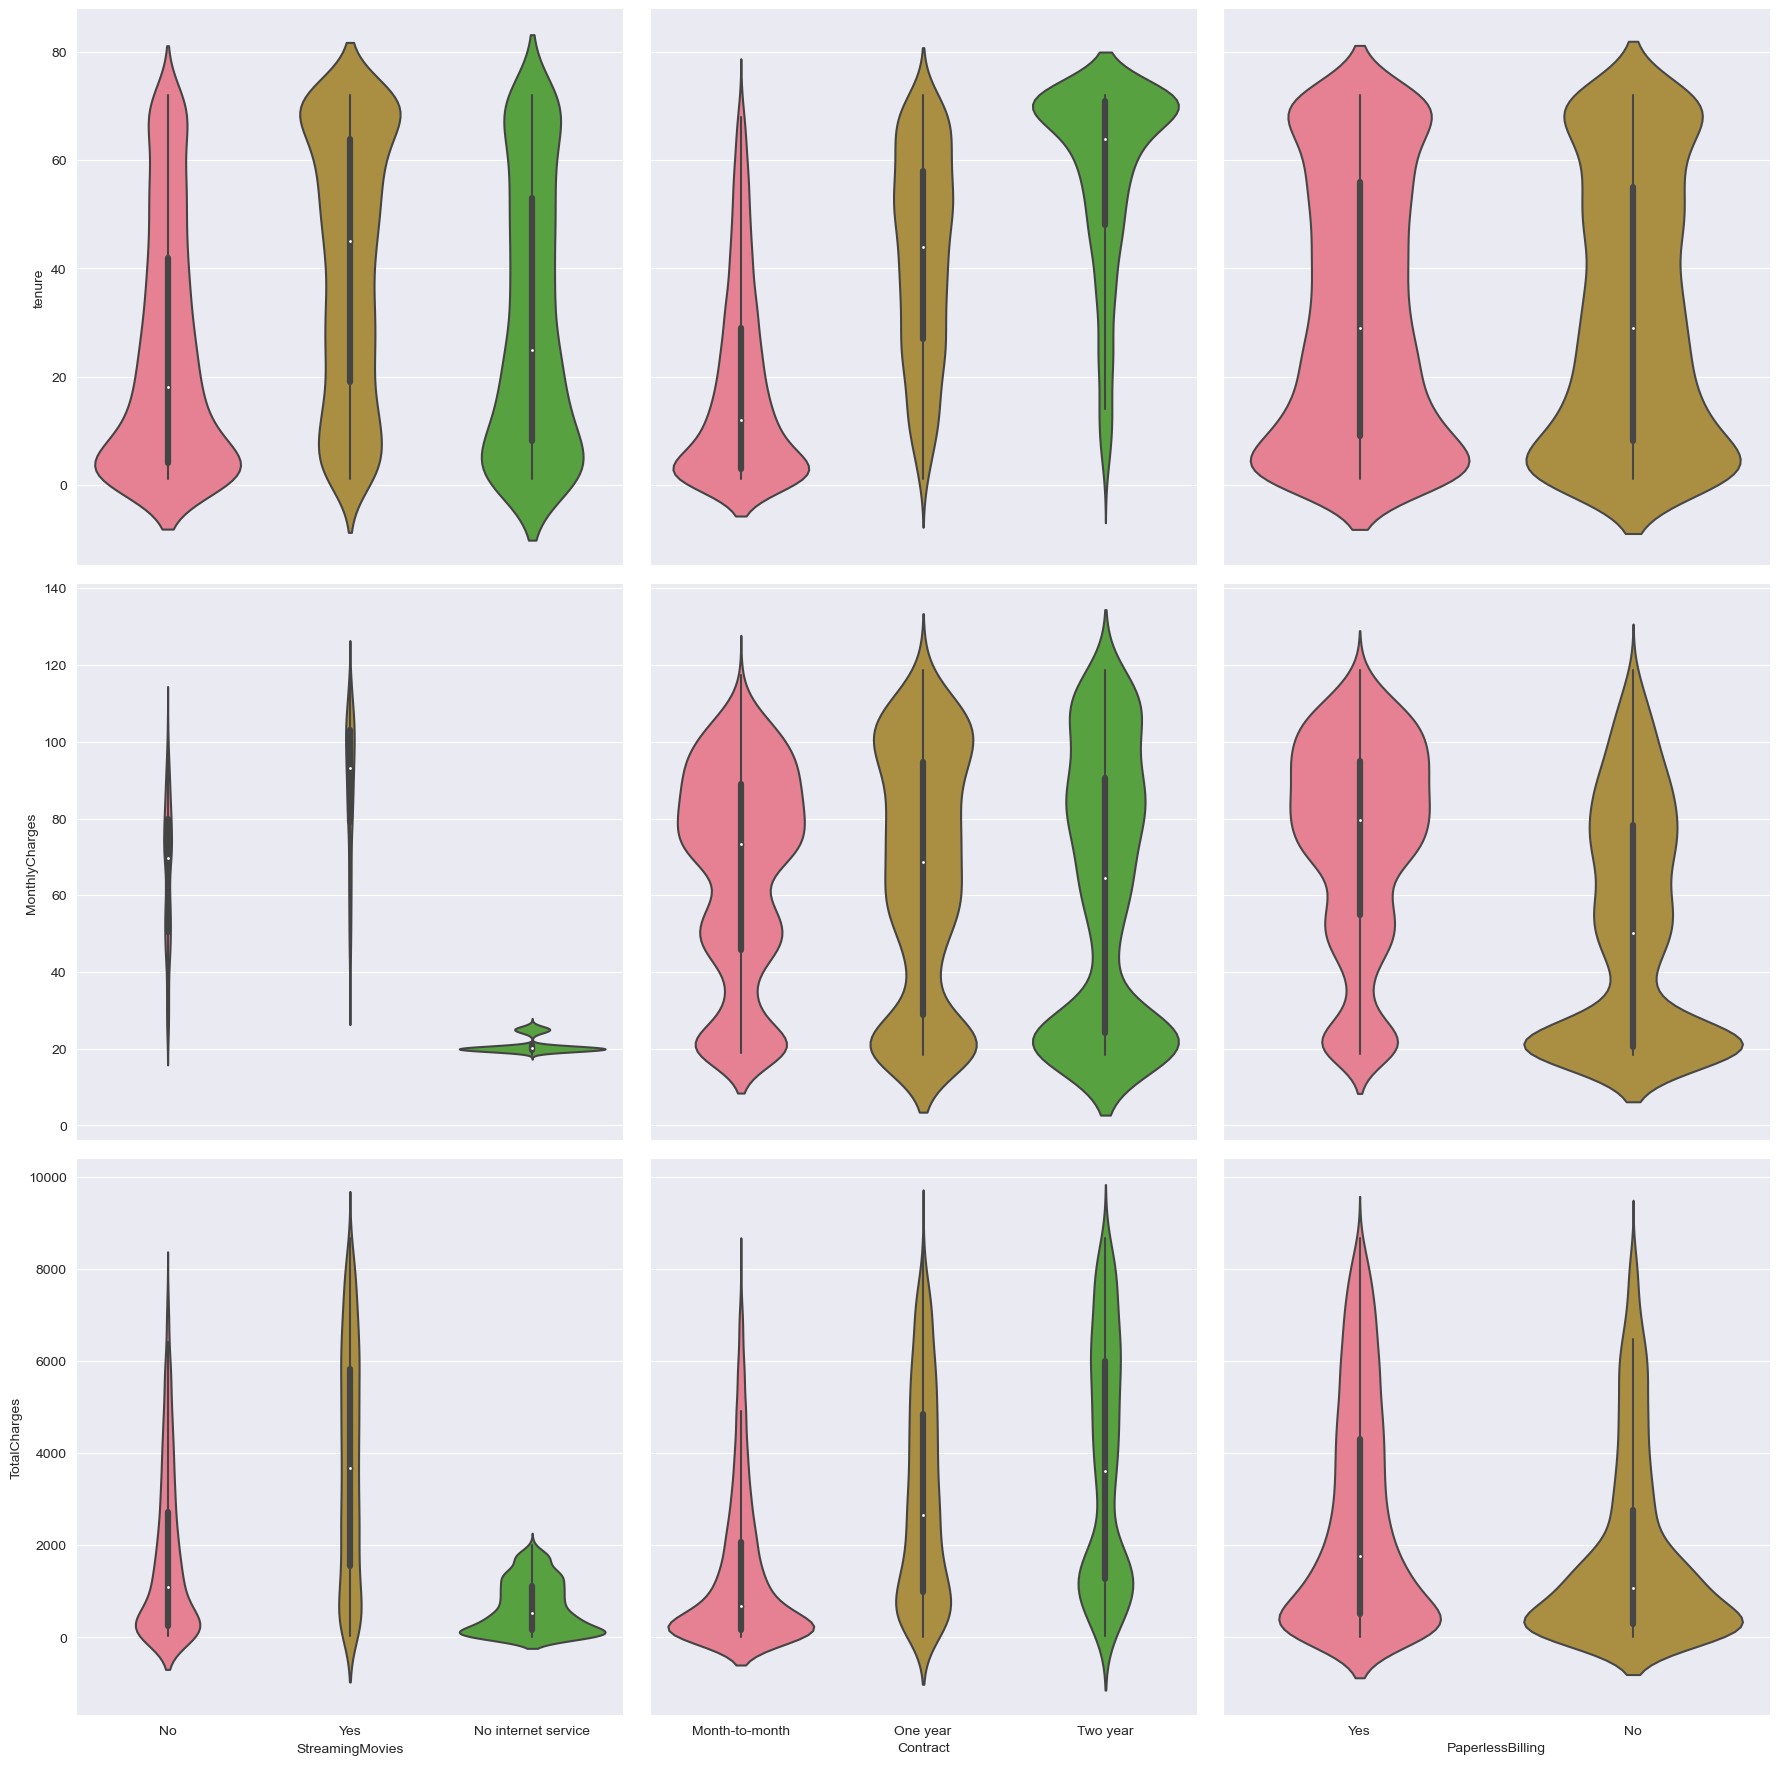

In [126]:
g = sns.PairGrid(df, x_vars=df_category.columns[12:15].values,y_vars=df_numeric.columns[0:3].values,size=6)
g.map(sns.violinplot);


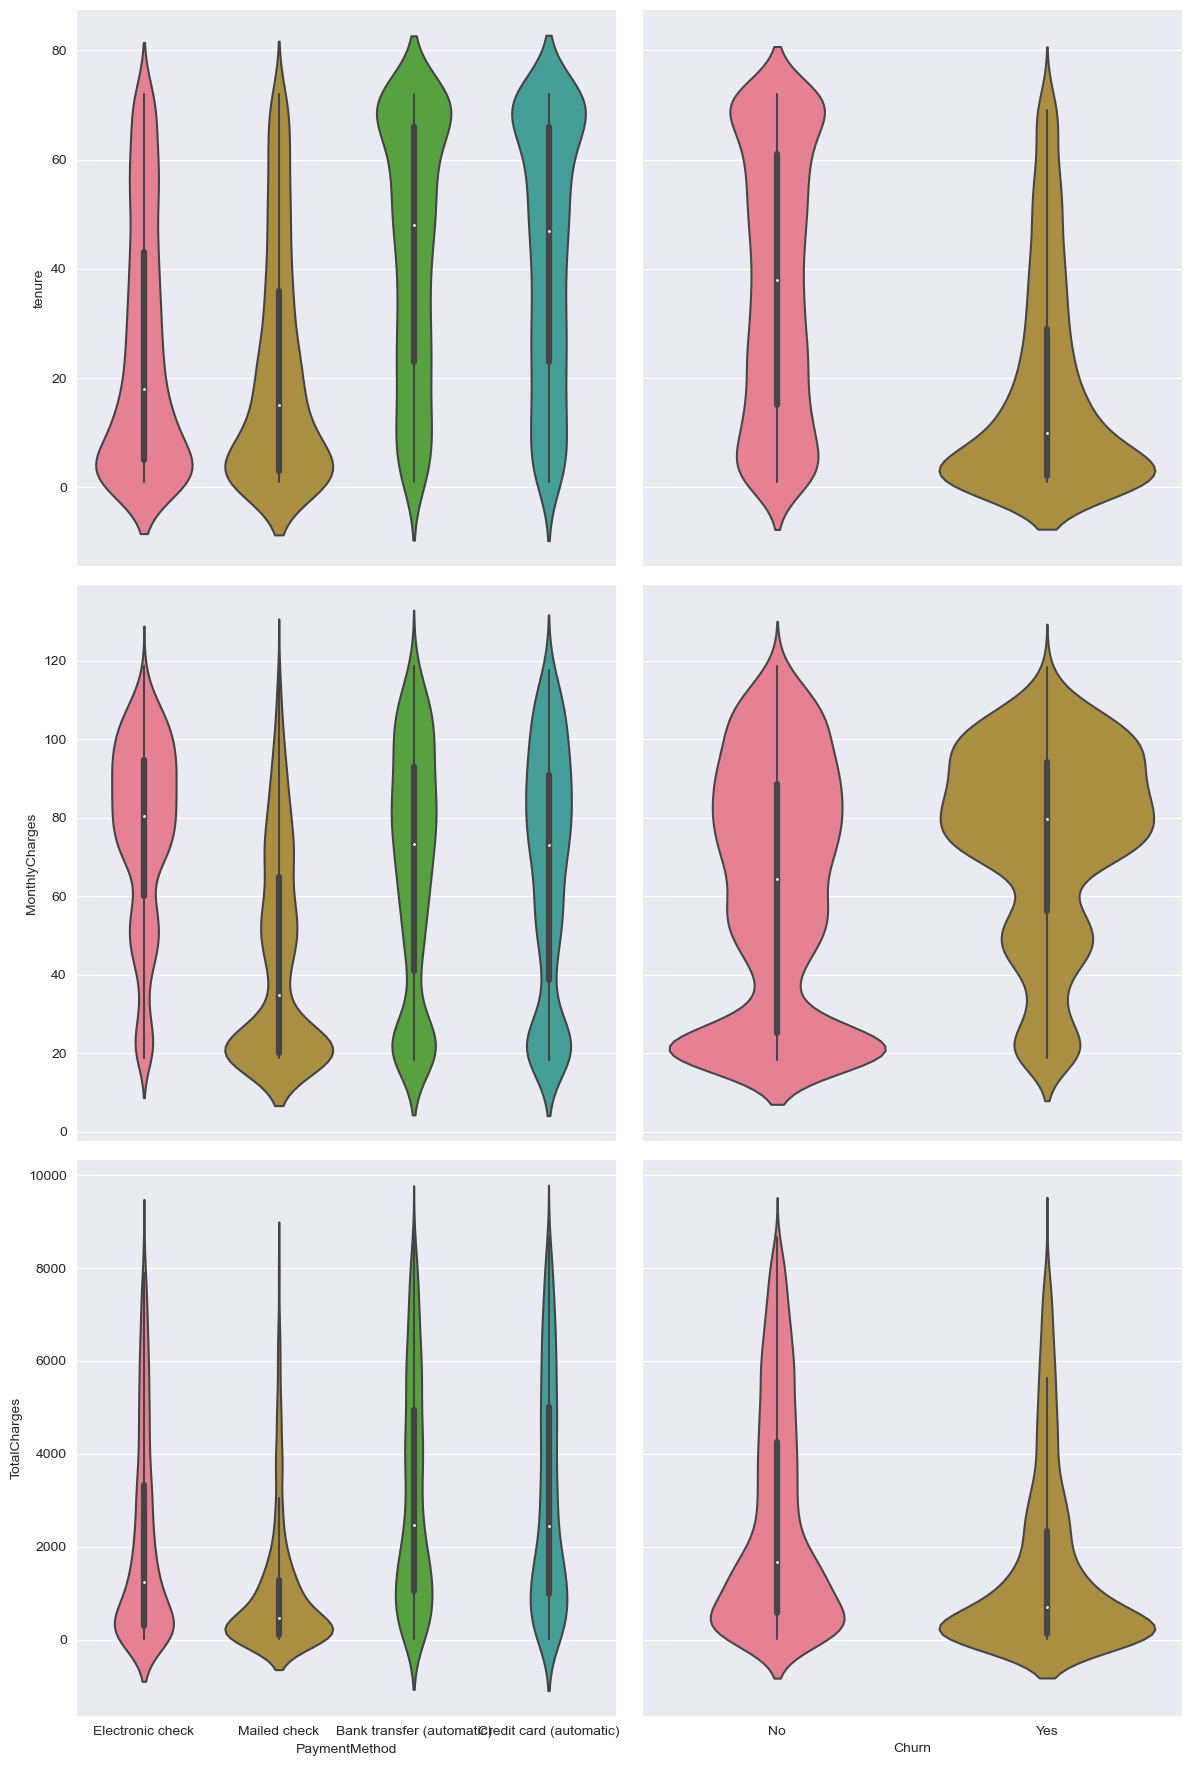

In [127]:
g = sns.PairGrid(df, x_vars=df_category.columns[15:17].values,y_vars=df_numeric.columns[0:3].values,size=6)
g.map(sns.violinplot);

*** Churn Rate across all variables ***

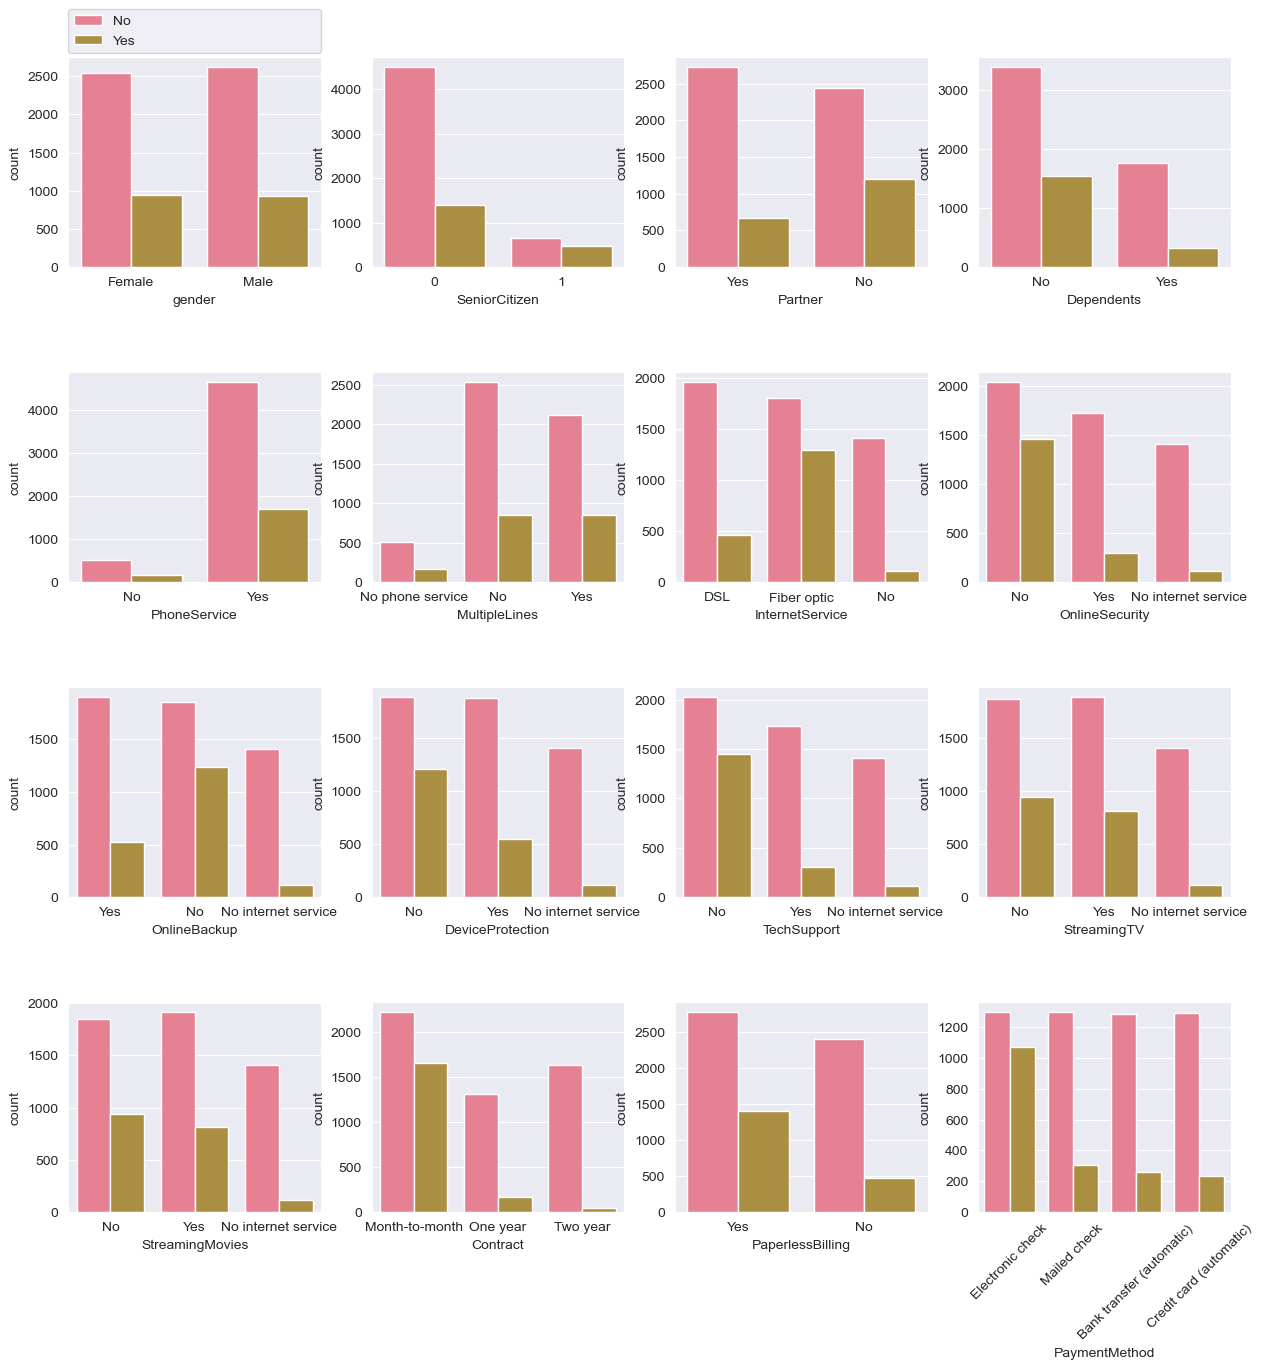

In [128]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=df_category.iloc[:,i], hue=df_category["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

### Data Preparation

In [129]:
data = pd.get_dummies(df_category)

In [130]:
y=data['Churn_Yes']

In [131]:
ind_var = pd.concat([df_numeric,data],axis=1)

In [132]:
X=ind_var.drop(["Churn_Yes", "Churn_No","Churn"], axis=1)

*** Test Train Split ***

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

## Training and Predicting

In [134]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

*** Predictions ***

In [135]:
predictions = logmodel.predict(X_test)

*** Evaluation ***

In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print('The accuracy : ',accuracy_score(y_test, predictions))
print('Confusion Matrix : \n',confusion_matrix(y_test, predictions))
print('Classification Report: \n', classification_report(y_test, predictions))

The accuracy :  0.8035329599310642
Confusion Matrix : 
 [[1502  205]
 [ 251  363]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1707
           1       0.64      0.59      0.61       614

    accuracy                           0.80      2321
   macro avg       0.75      0.74      0.74      2321
weighted avg       0.80      0.80      0.80      2321

